# 🧠 Bitcoin Price Prediction Project

This notebook demonstrates a simple approach to analyzing and predicting Bitcoin prices using historical data. 
We perform exploratory data analysis, examine feature correlations, and build a regression model to forecast the next day's price.

---

In [123]:
import pandas as pd
import numpy as np
path = 'data//raw//btc-usd-max.csv'
data = pd.read_csv(path, index_col=0)

### Generate summary statistics of the dataset

In [124]:
data.tail(5)


,price,market_cap,total_volume
snapped_at,,,
2025-07-06 00:00:00 UTC,108217.468500,2.152344e+12,1.004294e+10
2025-07-07 00:00:00 UTC,109215.197718,2.171498e+12,1.463867e+10
2025-07-08 00:00:00 UTC,108300.716758,2.153778e+12,2.549325e+10
2025-07-09 00:00:00 UTC,108953.191877,2.167049e+12,2.048887e+10
2025-07-10 00:00:00 UTC,111327.530542,2.215211e+12,3.707846e+10


In [125]:
data.describe()

,price,market_cap,total_volume
count,4455.000000,4.455000e+03,4.455000e+03
mean,20705.377037,3.971762e+11,1.715767e+10
std,26663.194440,5.254315e+11,2.066865e+10
min,67.809000,7.713681e+08,0.000000e+00
25%,635.893150,9.390701e+09,4.270404e+08
50%,8405.560563,1.475289e+11,9.786025e+09
75%,31552.123659,5.978800e+11,2.785896e+10
max,111560.356938,2.215211e+12,1.904603e+11


### Check for missing values in the dataset

In [126]:
# check for missing data
data.isnull().sum()

price           0
market_cap      0
total_volume    0
dtype: int64

In [127]:
data['previous_price'] = data['price'].shift(1)

data = data.dropna(subset=['previous_price']).reset_index(drop=True)

data['price'] = np.log1p(data['price'])
data['previous_price'] = np.log1p(data['previous_price'])
data['market_cap'] = np.log1p(data['market_cap'])
data['total_volume'] = np.log1p(data['total_volume'])

# Посмотрим на результат
data.head()


,price,market_cap,total_volume,previous_price
0,4.962565,21.177541,0.0,4.914858
1,4.914858,21.129835,0.0,4.962565
2,4.770685,20.984823,0.0,4.914858
3,4.648517,20.861869,0.0,4.770685
4,4.521897,20.734272,0.0,4.648517


## 📈 Predictions vs Actual Visualization

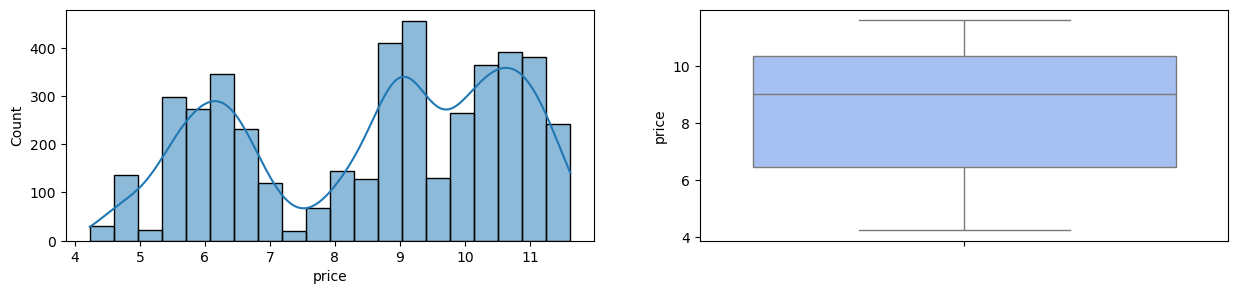

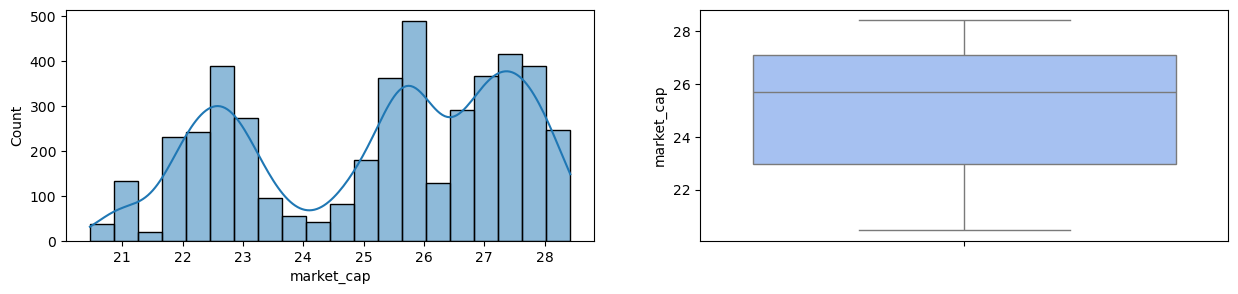

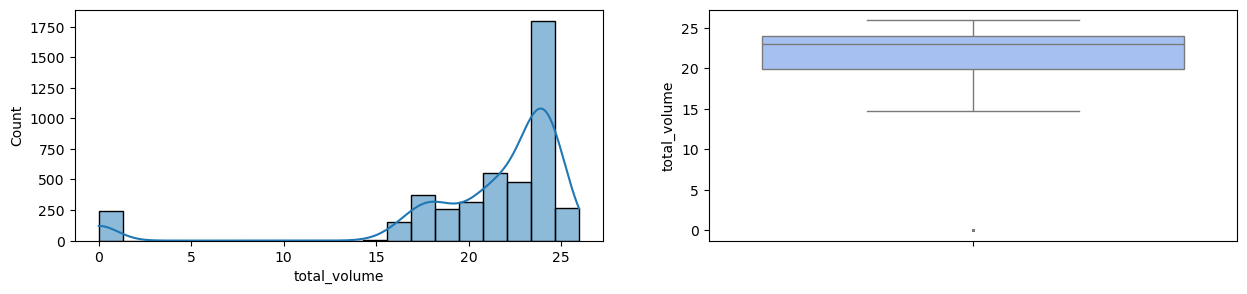

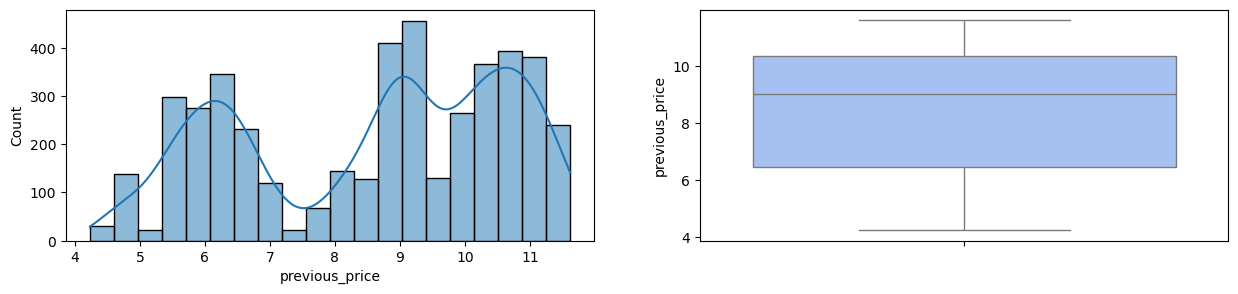

In [128]:
# check distribution of each feature
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
for i in data:
        fig, axs = plt.subplots(1,2,figsize=(15, 3))
        sns.histplot(data[i],bins=20, kde=True,ax=axs[0])
        sns.boxplot(data[i], ax = axs[1], color='#99befd', fliersize=1);
        plt.show()
        plt.close()

### Check for missing values in the dataset

In [129]:
data=data.interpolate()
data.isnull().sum()

price             0
market_cap        0
total_volume      0
previous_price    0
dtype: int64

In [130]:
X = data.drop(['price'], axis=1)
y = data[['price']]
y.head()

,price
0,4.962565
1,4.914858
2,4.770685
3,4.648517
4,4.521897


### Split the dataset into training and testing sets

In [131]:
from sklearn.model_selection import train_test_split

def train_val_test_split(data, y, test_ratio):
    val_ratio = test_ratio / (1 - test_ratio)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio, shuffle=False)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(data, y, 0.2)


In [132]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)
print(X_train, y_train)

(2672, 3) (2672, 1)
(891, 3) (891, 1)
(891, 3) (891, 1)
      market_cap  total_volume  previous_price
0      21.177541      0.000000        4.914858
1      21.129835      0.000000        4.962565
2      20.984823      0.000000        4.914858
3      20.861869      0.000000        4.770685
4      20.734272      0.000000        4.648517
...          ...           ...             ...
2667   26.121339     23.935146        9.415195
2668   26.101596     23.875326        9.388538
2669   26.112543     23.736511        9.370270
2670   26.084073     23.876273        9.381166
2671   26.096884     23.697406        9.351503

[2672 rows x 3 columns]          price
0     4.962565
1     4.914858
2     4.770685
3     4.648517
4     4.521897
...        ...
2667  9.388538
2668  9.370270
2669  9.381166
2670  9.351503
2671  9.365409

[2672 rows x 1 columns]


d:\Conda\envs\bitenv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\Conda\envs\bitenv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


['artifacts/target_scaler.joblib']

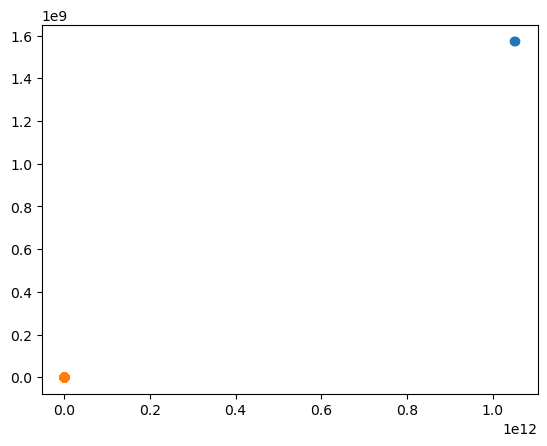

In [133]:
# feature scaling 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def get_scaler(scaler):
    scalers = {
        "minmax": MinMaxScaler,
        "ss": StandardScaler
    }
    return scalers.get(scaler.lower())()
scaler = get_scaler('ss')

test_featuresz= [[1724854479045.6724,1.004294e+10,86960.8555491039],[1730000000000,1.004294e+10,86000]]
test_targetsz= np.array([85000,87000]).reshape(-1,1)

X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)
X_val_ = scaler.transform(X_val)
test_featuresz= scaler.transform(test_featuresz)

import joblib
joblib.dump(scaler, 'artifacts/scaler.joblib')
target_scaler=get_scaler('ss')
plt.scatter(test_featuresz[:,0],test_featuresz[:,1])
plt.scatter(X_test_[:,0],X_test_[:,1])
y_train_ = target_scaler.fit_transform(y_train)
y_val_ = target_scaler.transform(y_val)
y_test_ = target_scaler.transform(y_test)
test_targetsz=target_scaler.transform(test_targetsz)
import joblib
joblib.dump(target_scaler, 'artifacts/target_scaler.joblib')

In [134]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

batch_size = 64
print(X_train_.shape,X_test_.shape,X_val_.shape)
X_train_= np.concatenate((X_train_,X_test_,X_val_))
y_train_ = np.concatenate((y_train_,y_test_,y_val_))
train_features = torch.Tensor(X_train_)
train_targets = torch.Tensor(y_train_)
val_features = torch.Tensor(X_val_)
val_targets = torch.Tensor(y_val_)
test_features = torch.Tensor(np.concatenate((X_test_,X_val_)))
test_targets = torch.Tensor(np.concatenate((y_test_,y_val_)))
print(train_features.shape, train_targets.shape)
train = TensorDataset(train_features, train_targets)
val = TensorDataset(test_features, test_targets)
print(test_features.shape, test_targets.shape)
test = TensorDataset(test_features, test_targets)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader_one = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
print(val_features.shape, val_targets.shape)

(2672, 3) (891, 3) (891, 3)
torch.Size([4454, 3]) torch.Size([4454, 1])
torch.Size([1782, 3]) torch.Size([1782, 1])
torch.Size([891, 3]) torch.Size([891, 1])


myLSTM class initiates a LSTM module based on PyTorch's nn.Module class.

       Attributes:
           hidden_dim (int): The number of nodes in each layer
           layer_dim (str): The number of layers in the network
           lstm (nn.LSTM): The LSTM model constructed with the input parameters.
           fc (nn.Linear): The fully connected layer to convert the final state of LSTMs to our desired output shape.

The __init__ method that initiates a LSTM instance.

        Args:
            input_dim (int): The number of nodes in the input layer
            hidden_dim (int): The number of nodes in each layer
            layer_dim (int): The number of layers in the network
            output_dim (int): The number of nodes in the output layer
            dropout_prob (float): The probability of nodes being dropped out

        
The forward method takes input tensor x and does forward propagation

        Args:
            x (torch.Tensor): The input tensor of the shape (batch size, sequence length, input_dim)

        Returns:
            torch.Tensor: The output tensor of the shape (batch size, output_dim)

       

## 🤖 Model Training

In [135]:
class myLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob,device='cuda'):
        super(myLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob,device=device
        )
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device='cuda').requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device='cuda').requires_grad_()
        
        # Forward propagation by passing in the input, hidden state, and cell state into the model
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]
        out = F.relu(out)
        out = self.fc(out)
        return out

In [136]:
def get_model(model, model_params):
    models = {"lstm": myLSTM }
    return models.get(model.lower())(**model_params)

In [137]:
class Optimization:
    def __init__(self, model, loss_fn, optimizer,scheduler):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_losses = []
        self.val_losses = []
        self.scheduler = scheduler
        
    def train_step(self, x, y):
        self.model.train() # Sets model to train mode
        yhat = self.model(x) # Makes predictions
        loss = self.loss_fn(y, yhat) # Computes loss
        loss.backward() # Computes gradients
        self.optimizer.step() # Updates parameters and zeroes gradients
        self.optimizer.zero_grad()
        return loss.item() # Returns the loss

    def train(self, train_loader, val_loader, batch_size=64, n_epochs=50, n_features=2, device='cuda', scheduler=None):
        model_path = f'artifacts/model2.pth'

        for epoch in range(1, n_epochs + 1):
            self.model.train()
            batch_losses = []

            for x_batch, y_batch in train_loader:
                x_batch = x_batch.view([batch_size, -1, n_features]).to(device)
                y_batch = y_batch.to(device)
                loss = self.train_step(x_batch, y_batch)
                batch_losses.append(loss)

            training_loss = np.mean(batch_losses)
            self.train_losses.append(training_loss)

            # Валидация
            self.model.eval()
            with torch.no_grad():
                batch_val_losses = []
                for x_val, y_val in val_loader:
                    x_val = x_val.view([batch_size, -1, n_features]).to(device)
                    y_val = y_val.to(device)
                    yhat = self.model(x_val)
                    val_loss = self.loss_fn(y_val, yhat).item()
                    batch_val_losses.append(val_loss)

                validation_loss = np.mean(batch_val_losses)
                self.val_losses.append(validation_loss)

            # Шаг планировщика lr, если он передан
            if scheduler is not None:
                scheduler.step(validation_loss)

            # Печать
            if (epoch <= 50) or (epoch % 100 == 0):
                print(
                    f"[{epoch}/{n_epochs}] Training loss: {training_loss:.6f}\t Validation loss: {validation_loss:.6f}"
                )

        # Сохранение модели
        torch.save(self.model.state_dict(), model_path)

    def evaluate(self, test_loader, batch_size=64, n_features=2,device='cuda'):
        with torch.no_grad():
            predictions = []
            values = []
            for x_test, y_test in test_loader:
                x_test = x_test.view([batch_size, -1, n_features]).to(device)
                y_test = y_test.to(device)
                self.model.eval()
                yhat = self.model(x_test)
                predictions.append(yhat.to('cpu').detach().numpy())
                values.append(y_test.to('cpu').detach().numpy())

        return predictions, values

    def plot_losses(self):
        figure(figsize=(20, 10), dpi=80)
        plt.plot(self.train_losses, label="Training loss")
        plt.plot(self.val_losses, label="Validation loss")
        plt.legend()
        plt.title("Losses")
        plt.show()
        plt.close()

Using device: cuda


d:\Conda\envs\bitenv\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


[1/100] Training loss: 0.948565	 Validation loss: 1.676190
[2/100] Training loss: 0.941693	 Validation loss: 1.664071
[3/100] Training loss: 0.934531	 Validation loss: 1.650798
[4/100] Training loss: 0.926415	 Validation loss: 1.635659
[5/100] Training loss: 0.917137	 Validation loss: 1.618327
[6/100] Training loss: 0.906342	 Validation loss: 1.598094
[7/100] Training loss: 0.893754	 Validation loss: 1.574626
[8/100] Training loss: 0.879303	 Validation loss: 1.547453
[9/100] Training loss: 0.862389	 Validation loss: 1.514999
[10/100] Training loss: 0.842218	 Validation loss: 1.476580
[11/100] Training loss: 0.818879	 Validation loss: 1.430884
[12/100] Training loss: 0.791498	 Validation loss: 1.377066
[13/100] Training loss: 0.759651	 Validation loss: 1.313291
[14/100] Training loss: 0.722648	 Validation loss: 1.238721
[15/100] Training loss: 0.680742	 Validation loss: 1.153152
[16/100] Training loss: 0.632944	 Validation loss: 1.054808
[17/100] Training loss: 0.579499	 Validation loss

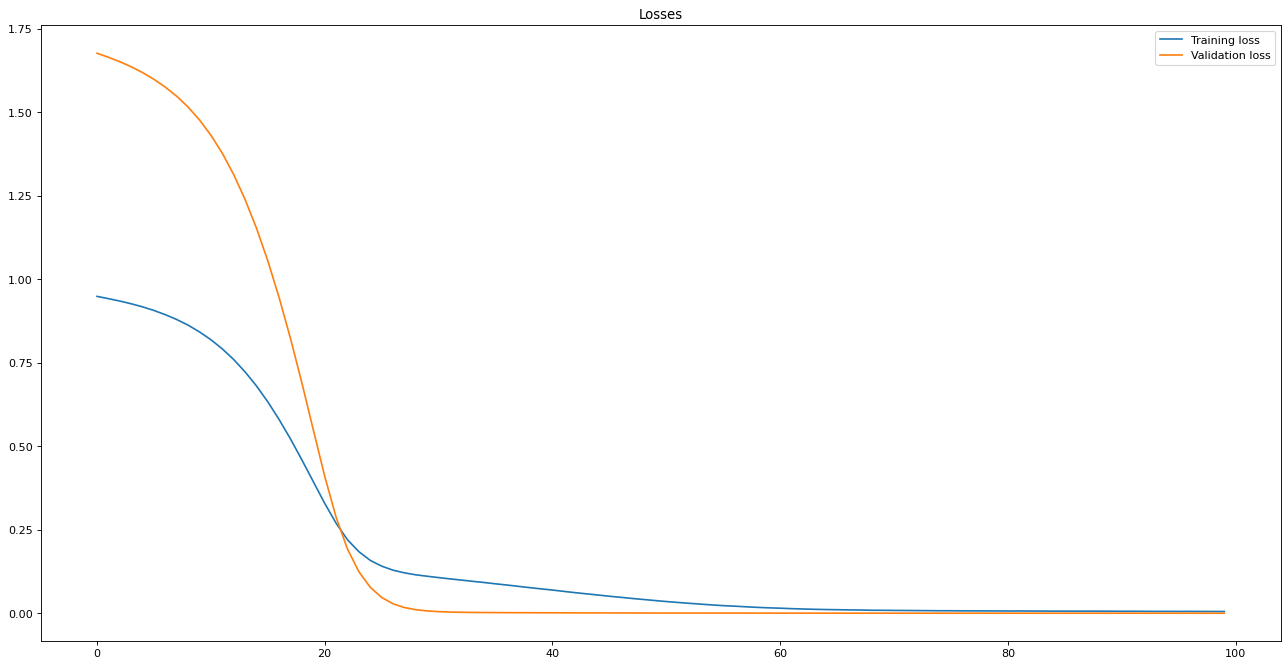

In [138]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from datetime import datetime

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Параметры модели
input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 512            
layer_dim = 2              
dropout = 0.3                
batch_size = 64
n_epochs = 100
learning_rate = 1e-5      
weight_decay = 1e-4

# Создание модели
model_params = {
    'input_dim': input_dim,
    'hidden_dim': hidden_dim,
    'layer_dim': layer_dim,
    'output_dim': output_dim,
    'dropout_prob': dropout,
    'device': device
}

model = get_model('lstm', model_params).to(device)

# Функция потерь и оптимизатор
loss_fn = nn.SmoothL1Loss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Добавляем scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

# Обучение
opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer, scheduler=scheduler)

opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()

# Оценка
predictions, values = opt.evaluate(
    test_loader_one,
    batch_size=batch_size,
    n_features=input_dim
)


## Model evaluation and saving

In [139]:
def inverse_transform(scaler, data, columns):
    for col in columns:
        data[col] = scaler.inverse_transform(data[col])
    return data


def format_predictions(predictions, values,scaler, data_test=None):
    vals = np.concatenate(values, axis=0).ravel()
    preds = np.concatenate(predictions, axis=0).ravel()
    #data_result = pd.DataFrame(data={"value": vals, "prediction": preds}, index=data_test.head(len(vals)).index)
    data_result = pd.DataFrame(data={"value": vals, "prediction": preds})
    data_result = data_result.sort_index()
    data_result = inverse_transform(scaler, data_result, [["value", "prediction"]])
    data_result['value']=np.expm1(data_result['value'])
    data_result['prediction']=np.expm1(data_result['prediction'])
    return data_result


data_result = format_predictions(predictions, values, target_scaler, X_test)
data_result

,value,prediction
0,23137.330078,23570.009766
1,23725.152344,24206.449219
2,23539.683594,24694.400391
3,23451.574219,24441.630859
4,23340.343750,23327.392578
...,...,...
1723,16923.376953,17019.230469
1724,17149.923828,17087.769531
1725,16973.373047,17390.214844
1726,17085.634766,17231.820312


In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_metrics(data):
    result_metrics = {'mae' : mean_absolute_error(data.value, data.prediction),
                      'rmse' : mean_squared_error(data.value, data.prediction) ** 0.5,
                      'r2' : r2_score(data.value, data.prediction)}
    
    print("Mean Absolute Error:       ", result_metrics["mae"])
    print("Root Mean Squared Error:   ", result_metrics["rmse"])
    print("R^2 Score:                 ", result_metrics["r2"])
    return result_metrics

result_metrics = calculate_metrics(data_result)


Mean Absolute Error:        1433.77392578125
Root Mean Squared Error:    2040.0175857085153
R^2 Score:                  0.9935938715934753


In [141]:
def busted_format_predictions(predictions, values,  scaler):
    vals = np.concatenate(values, axis=0).ravel()
    preds = np.concatenate(predictions, axis=0).ravel()
    data_result = pd.DataFrame(data={"value": vals, "prediction": preds})
    data_result = data_result.sort_index()
    data_result = inverse_transform(scaler, data_result, [["value", "prediction"]])
    return data_result

In [142]:
torch.save(model.state_dict(), 'artifacts/model2.pth')

In [143]:
from src.data_request import get_current_currency
from src.model import myLSTM, inverse_transform
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

import joblib
import numpy as np

In [144]:
from src.data_request import get_current_currency
from src.model import myLSTM, inverse_transform
def predict():
    device ="cpu"
    input_dim = 3
    output_dim = 1
    hidden_dim = 512
    layer_dim = 2
    dropout = 0.3

    model_params = {'input_dim': input_dim,
                    'hidden_dim' : hidden_dim,
                    'layer_dim' : layer_dim,
                    'output_dim' : output_dim,
                    'dropout_prob' : dropout,
                    'device' : device,}
    model = myLSTM(**model_params)
    model.load_state_dict(torch.load("artifacts/model2.pth",map_location=torch.device('cpu')))
    model.eval()
    scaler = joblib.load("artifacts/scaler.joblib")
    target_scaler=joblib.load("artifacts/target_scaler.joblib")
    df = np.array((np.log1p(2.33116139e+12),np.log1p( 1.27102979e+11),np.log1p( 1.17197346e+05))).reshape(1,-1)
    print('dd',df)
    df=scaler.transform(df)
    print(df)
    
    input_tensor = torch.Tensor(df)
    input_tensor=TensorDataset(input_tensor)
    input_tensor=DataLoader(input_tensor, batch_size=1, shuffle=False)
    predictions=[]
    with torch.no_grad():
        for batch in input_tensor:
            x=batch[0]
            x=x.unsqueeze(1)
            output=model(x)   
            predictions.append(output.item())
    data_result = inverse_transform(target_scaler, np.array(predictions).reshape(1, -1))
    return data_result

In [145]:
from src.data_request import get_current_currency
#print(get_current_currency())

In [146]:
pred = predict()
print([np.expm1(p) for p in pred],)

dd [[28.47738771 25.56826345 11.67162304]]
[[2.8433589  1.05144173 2.90824793]]
[array([124982.91061288])]


C:\Users\Asus\AppData\Local\Temp\ipykernel_14492\1580292974.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("artifacts/model2.pth",map_